# 29회차 기출문제
## 문제 1

**Data description**

임대아파트 입주자 퇴거여부 예측을 위한 데이터입니다.

- 순번: 데이터의 순서를 나타내는 고유 번호
- 계약구분: 계약의 유형(예: 유효, 해지)
- 재계약횟수: 재계약이 이루어진 횟수
- 거주개월: 해당 아파트에 거주한 총 개월 수
- 아파트 이름: 아파트의 이름
- 아파트 ID: 아파트를 식별하는 고유 ID
- 아파트 평점: 아파트의 평점
- 호실고유번호: 아파트의 특정 호실을 식별하는 고유 번호
- 층: 거주하고 있는 층수
- 평형대: 아파트의 면적(평수)
- 계약자고유번호: 계약자를 식별하는 고유 번호
- 계약서고유번호: 계약서를 식별하는 고유 번호
- 입주연도: 처음 입주한 연도
- 퇴거연도: 퇴거한 연도
- 거주연도: 거주한 총 연도 수
- 월세(원): 월세 금액
- 보증금(원): 보증금 금액
- 대표나이: 대표 거주자의 나이
- 나이: 개별 거주자의 나이
- 성별: 개별 거주자의 성별(예: 남, 여)
- 결혼여부: 개별 거주자의 결혼 여부(예: 미혼, 기혼)
- 거주자 수: 해당 호실에 거주하는 총 인원 수
- 퇴거 여부(target): 퇴거 여부(예: 미퇴거, 퇴거)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib
import warnings

warnings.filterwarnings('ignore')

df1 = pd.read_csv('https://raw.githubusercontent.com/qiwerr1004/ADP_go/main/29/problem1.csv')

print(df1.info())
display(df1.head(1))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86904 entries, 0 to 86903
Data columns (total 23 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   순번       86904 non-null  int64  
 1   계약구분     86396 non-null  object 
 2   재계약횟수    86904 non-null  int64  
 3   거주개월     86904 non-null  int64  
 4   아파트 이름   86904 non-null  object 
 5   아파트 ID   86904 non-null  int64  
 6   아파트 평점   85679 non-null  float64
 7   호실고유번호   86904 non-null  int64  
 8   층        86904 non-null  int64  
 9   평형대      86904 non-null  int64  
 10  계약자고유번호  86904 non-null  int64  
 11  계약서고유번호  86904 non-null  int64  
 12  입주연도     86904 non-null  int64  
 13  퇴거연도     25762 non-null  float64
 14  거주연도     86904 non-null  int64  
 15  월세(원)    86904 non-null  float64
 16  보증금(원)   86904 non-null  int64  
 17  대표나이     86904 non-null  int64  
 18  나이       86904 non-null  int64  
 19  성별       86904 non-null  object 
 20  결혼여부     86904 non-null  object 
 21  거주자 수    869

,순번,계약구분,재계약횟수,거주개월,아파트 이름,아파트 ID,아파트 평점,호실고유번호,층,평형대,...,퇴거연도,거주연도,월세(원),보증금(원),대표나이,나이,성별,결혼여부,거주자 수,퇴거여부
0,1,유효,10,222,강남아파트,5,7.0,14520,1,12,...,NaN,2008,47100.0,3646000,46,33,남,미혼,3,미퇴거


#### 1-1.계약자고유번호를 기준으로 거주연도 별 여러개의 데이터가 쌓여 있다.  각 계약자고유번호에 대해 가장 최신의 거주연도 행만 남기시오.

In [2]:
df1 = df1.loc[df1.groupby('계약자고유번호')['거주연도'].idxmax()]
print(f"처리 후 데이터수: {len(df1)}")
df1.head()

처리 후 데이터수: 10348


,순번,계약구분,재계약횟수,거주개월,아파트 이름,아파트 ID,아파트 평점,호실고유번호,층,평형대,...,퇴거연도,거주연도,월세(원),보증금(원),대표나이,나이,성별,결혼여부,거주자 수,퇴거여부
85372,12673,해지,4,88,지산5단지아파트,3,8.0,85369,6,12,...,2012.0,2012,77300.0,5302000,44,35,남,기혼,2,퇴거
85427,12683,해지,7,174,지산5단지아파트,3,8.0,85421,6,15,...,2016.0,2016,48600.0,2144000,32,27,남,미혼,1,퇴거
85587,12702,유효,10,237,지산5단지아파트,3,8.0,85576,7,15,...,NaN,2020,81600.0,5598000,67,66,남,미혼,1,미퇴거
86190,12789,유효,10,227,지산5단지아파트,3,8.0,86179,10,19,...,NaN,2020,66600.0,3116000,61,60,남,기혼,3,미퇴거
86235,12796,유효,10,222,지산5단지아파트,3,8.0,86224,10,15,...,NaN,2020,129240.0,8865600,58,57,여,미혼,2,미퇴거


In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10348 entries, 85372 to 10361
Data columns (total 23 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   순번       10348 non-null  int64  
 1   계약구분     10287 non-null  object 
 2   재계약횟수    10348 non-null  int64  
 3   거주개월     10348 non-null  int64  
 4   아파트 이름   10348 non-null  object 
 5   아파트 ID   10348 non-null  int64  
 6   아파트 평점   10208 non-null  float64
 7   호실고유번호   10348 non-null  int64  
 8   층        10348 non-null  int64  
 9   평형대      10348 non-null  int64  
 10  계약자고유번호  10348 non-null  int64  
 11  계약서고유번호  10348 non-null  int64  
 12  입주연도     10348 non-null  int64  
 13  퇴거연도     4092 non-null   float64
 14  거주연도     10348 non-null  int64  
 15  월세(원)    10348 non-null  float64
 16  보증금(원)   10348 non-null  int64  
 17  대표나이     10348 non-null  int64  
 18  나이       10348 non-null  int64  
 19  성별       10348 non-null  object 
 20  결혼여부     10348 non-null  object 
 21  거주자 수   

#### 1-2. 결측치를 처리하시오.

In [4]:
print("<변수별 결측치 개수>\n")
print(df1.isna().sum())
print("\n<변수별 결측 비율>")
print(f"{(df1.isna().sum()/len(df1)).round(3)*100}%")

<변수별 결측치 개수>

순번            0
계약구분         61
재계약횟수         0
거주개월          0
아파트 이름        0
아파트 ID        0
아파트 평점      140
호실고유번호        0
층             0
평형대           0
계약자고유번호       0
계약서고유번호       0
입주연도          0
퇴거연도       6256
거주연도          0
월세(원)         0
보증금(원)        0
대표나이          0
나이            0
성별            0
결혼여부          0
거주자 수         0
퇴거여부          0
dtype: int64

<변수별 결측 비율>
순번          0.0
계약구분        0.6
재계약횟수       0.0
거주개월        0.0
아파트 이름      0.0
아파트 ID      0.0
아파트 평점      1.4
호실고유번호      0.0
층           0.0
평형대         0.0
계약자고유번호     0.0
계약서고유번호     0.0
입주연도        0.0
퇴거연도       60.5
거주연도        0.0
월세(원)       0.0
보증금(원)      0.0
대표나이        0.0
나이          0.0
성별          0.0
결혼여부        0.0
거주자 수       0.0
퇴거여부        0.0
dtype: float64%


In [5]:
# 통계량 확인
print("<수치형 변수 통계량>")
display(df1.describe(include='number').T)
print("<명목형 변수 통계량>")
display(df1.describe(include='O').T)

<수치형 변수 통계량>


,count,mean,std,min,25%,50%,75%,max
순번,10348.0,6.421883e+03,3.729156e+03,1.0,3175.25,6458.5,9636.25,12883.0
재계약횟수,10348.0,5.874179e+00,3.214748e+00,1.0,3.00,6.0,9.00,12.0
거주개월,10348.0,1.377855e+02,7.753239e+01,1.0,71.00,137.0,222.00,323.0
아파트 ID,10348.0,1.809335e+00,8.665034e-01,1.0,1.00,2.0,2.00,5.0
아파트 평점,10208.0,6.366379e+00,1.284759e+00,5.0,5.00,7.0,7.00,10.0
호실고유번호,10348.0,4.297824e+04,2.501663e+04,1.0,21277.75,42933.0,64586.00,86891.0
층,10348.0,7.861422e+00,4.284207e+00,1.0,4.00,8.0,12.00,15.0
평형대,10348.0,1.321985e+01,2.337744e+00,12.0,12.00,12.0,12.00,19.0
계약자고유번호,10348.0,4.850862e+04,2.684595e+04,1.0,25058.75,48593.5,74050.25,86892.0
계약서고유번호,10348.0,4.632348e+04,2.601192e+04,1.0,23263.75,48036.5,69061.25,86904.0


<명목형 변수 통계량>


,count,unique,top,freq
계약구분,10287,2,유효,6217
아파트 이름,10348,5,비둘기아파트,4419
성별,10348,2,여,5898
결혼여부,10348,2,미혼,8968
퇴거여부,10348,2,미퇴거,6256


In [6]:
df1.loc[df1['퇴거연도'].isna()]['퇴거여부'].value_counts()

미퇴거    6256
Name: 퇴거여부, dtype: int64

In [7]:
df1.loc[~df1['퇴거연도'].isna()]['퇴거여부'].value_counts()

퇴거    4092
Name: 퇴거여부, dtype: int64

In [8]:
df1.columns

Index(['순번', '계약구분', '재계약횟수', '거주개월', '아파트 이름', '아파트 ID', '아파트 평점', '호실고유번호',
       '층', '평형대', '계약자고유번호', '계약서고유번호', '입주연도', '퇴거연도', '거주연도', '월세(원)',
       '보증금(원)', '대표나이', '나이', '성별', '결혼여부', '거주자 수', '퇴거여부'],
      dtype='object')

<데이터 설명>  
- 총 23개의 변수로 이루어져 있으며, 퇴거여부가 종속변수이며, 나머지 22개의 변수가 설명변수이다.
- 수치형 변수: 11개  
  - 이산형: 재계약횟수, 층, 거주자 수, 거주개월, 평형대, 대표나이, 나이, 거주자 수, 아파트 평점
  - 연속형: 월세(원), 보증금(원)
   
- 명목형 변수: 12개 
  - 식별자: 순번, 호실 고유번호, 계약자 고유번호, 계약서 고유번호
  - 범주형: 계약구분, 아파트이름, 성별, 결혼여부, 퇴거여부, 아파트 ID, 아파트 이름(아이디와 같지만 추후 활용을 위해 미삭제)
  - 날짜형: 입주연도, 퇴거연도, 거주연도

- 삭제 변수 : 
  - 단순 식별자로 데이터 분석에 유의미한 데이터가 아님: 순번, 호실 고유번호, 계약자 고유번호, 계약서 고유번호
  - 중복되는 정보를 담은 변수: 퇴거연도(미퇴거 시 NaN 값, 퇴거 시 퇴거연도로 "퇴거여부" 변수와 중복)
- 결측치 처리:
  - 전체 데이터 대비 적은 결측치이며, 대체보다는 삭제가 타당: 계약구분, 아파트 평점


<수치형 변수 분포 시각화>


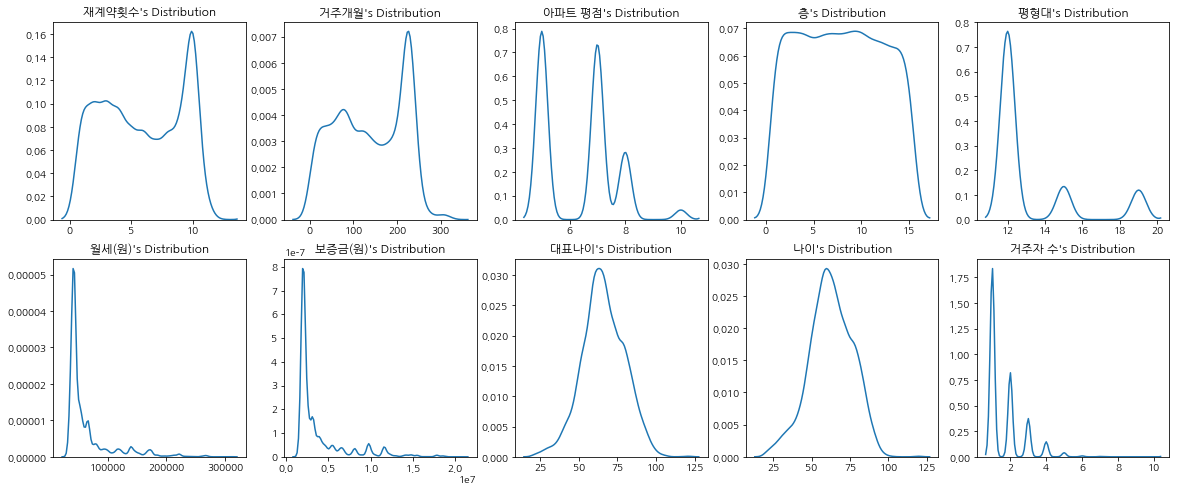

In [9]:
# 분포 시각화
#수치형 변수: 10
n_cols = ['재계약횟수', '거주개월', '아파트 평점', '층', '평형대', '월세(원)', '보증금(원)', '대표나이', '나이', '거주자 수']
#명목형 변수: 8
c_cols = ['계약구분', '성별', '결혼여부', '퇴거여부', '아파트 ID', '아파트 이름', '입주연도', '거주연도']
#삭제가 필요한 변수: 5
d_cols = ['순번', '호실고유번호', '계약자고유번호', '계약서고유번호', '퇴거연도']


print("<수치형 변수 분포 시각화>")
fig, ax = plt.subplots(2, 5, figsize=(20, 8))

for i, col in enumerate(n_cols):
    x = i // 5
    y = i % 5
    sns.kdeplot(data=df1[col], ax=ax[x, y], legend=None)
    ax[x, y].set_title(f"{col}'s Distribution")
plt.show()

<명목형 변수 분포 시각화>


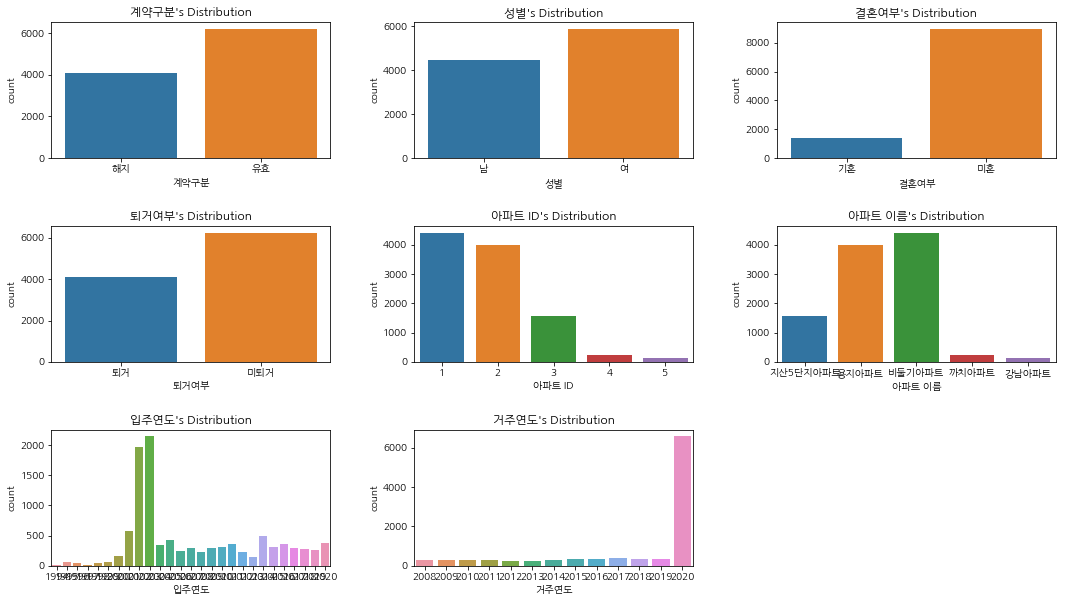

In [10]:
# 일단 명목형 변수
print("<명목형 변수 분포 시각화>")
fig, ax = plt.subplots(3, 3, figsize=(18, 10))

for i, col in enumerate(c_cols):
    x = i // 3
    y = i % 3
    sns.countplot(df1[col], ax=ax[x, y])
    ax[x, y].set_title(f"{col}'s Distribution")

ax[2, 2].remove()
plt.subplots_adjust(wspace=0.3, hspace=0.5)
plt.show()

<삭제할 변수 분포 시각화>


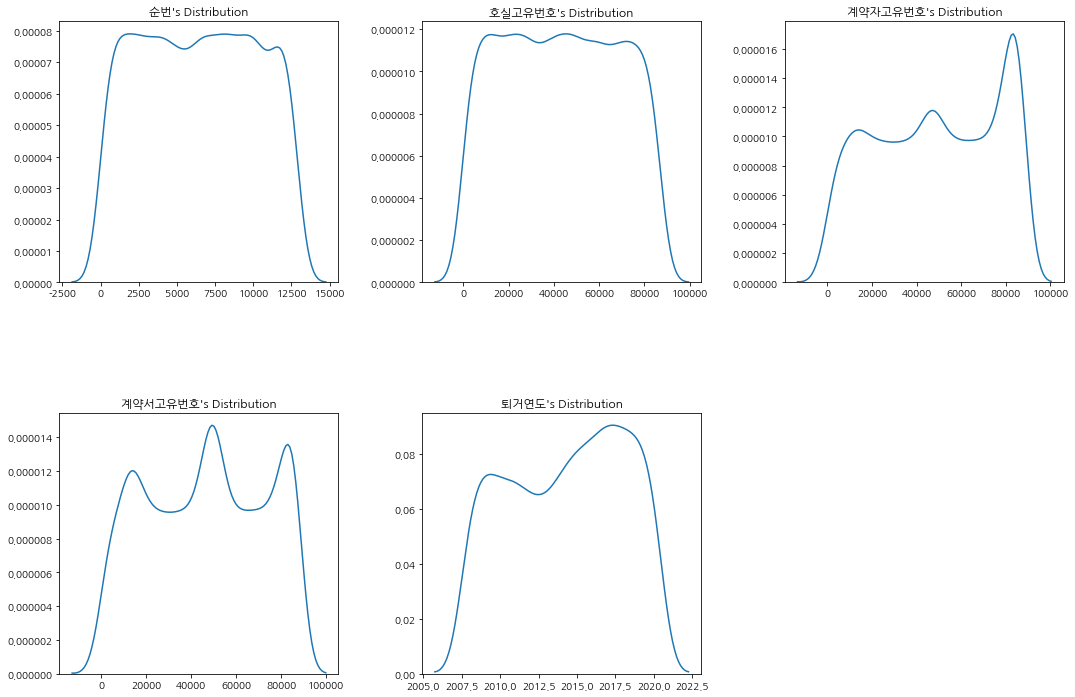

In [11]:
# 삭제할 변수의 분포
print("<삭제할 변수 분포 시각화>")
fig, ax = plt.subplots(2, 3, figsize=(18, 12))

for i, col in enumerate(d_cols):
    x = i // 3
    y = i % 3
    sns.kdeplot(df1[col], ax=ax[x, y], legend=None)
    ax[x, y].set_title(f"{col}'s Distribution")
plt.subplots_adjust(wspace=0.3, hspace=0.5)
ax[1, 2].remove()
plt.show()

위 데이터 분포를 통해 다음과 같은 사실을 알 수 있다.
- 수치형 변수
  - 재계약 횟수는 9~10개월, 거주개월은 200~300개월 사이에 집중되어 있다. 
  - 아파트 평점은 이봉 분포를 보인다.
  - 평형대는 12평이 가장 많다.
  - 나이와 대표나이는 비슷한 분포를 보이며, 좌측으로 약간 치우쳐있다.(약 음왜도)
  - 월세와 보증금은 좌측으로 심하게 치우치며, 우측 꼬리가 긴 분포를 보인다.(큰 음왜도)
  - 거주자수는 독신가구가 대다수이다.
- 명목형 변수
  - 계약이 유효한 건이 많다.
  - 여성의 비율이 다소 높으며, 미혼자가 대다수이다.
  - 미퇴거자가 많다.
  - 1번 아파트 거주민 수가 가장 많다. (1: 비둘기아파트, 2:용지아파트, 3:지산5단지아파트, 4:까치아파트, 5:강남아파트)
  - 2003년도 입주자 수가 가장 많다.
  - 2020년도 거주연도 수가 가장 높다.
  - 아파트 이름은 아파트 ID 분포와 동일
- 삭제할 변수
  - 단순식별자의 경우 모든 값의 개수가 같은 것을 확인할 수 있다. 데이터 정보로서 무가치하다.
  - 퇴거연도는 중복되는 정보를 담은 변수가 이미 있으므로 삭제한다.

In [12]:
df1_r = df1.drop(columns = d_cols, axis=1, inplace=True) #불필요 변수 삭제
df1_r = df1.dropna() # 결측치 보유 데이터 삭제
print(df1_r.isna().sum())

계약구분      0
재계약횟수     0
거주개월      0
아파트 이름    0
아파트 ID    0
아파트 평점    0
층         0
평형대       0
입주연도      0
거주연도      0
월세(원)     0
보증금(원)    0
대표나이      0
나이        0
성별        0
결혼여부      0
거주자 수     0
퇴거여부      0
dtype: int64


### 1- 3. 이상치를 처리하시오.

In [13]:
# 수치형 변수에 대한 이상치를 iqr 기준으로  판별하여 처리한다.
q1 = df1_r[n_cols].describe().T['25%']
q3 = df1_r[n_cols].describe().T['75%']
iqr = q3 - q1
up = q3 + 1.5*iqr
down = q1 - 1.5*iqr

iqr_df = pd.DataFrame({"상한치": up, "하한치": down}).reset_index()

iqr_df

,index,상한치,하한치
0,재계약횟수,18.0,-6.0
1,거주개월,448.5,-155.5
2,아파트 평점,10.0,2.0
3,층,24.0,-8.0
4,평형대,19.5,7.5
5,월세(원),103300.0,5700.0
6,보증금(원),6807000.0,-801000.0
7,대표나이,102.0,30.0
8,나이,101.5,25.5
9,거주자 수,3.5,-0.5


<수치형 변수별 이상치 개수>
재계약횟수: 0   [0.00 %]
거주개월: 0   [0.00 %]
아파트 평점: 0   [0.00 %]
층: 0   [0.00 %]
평형대: 0   [0.00 %]
월세(원): 1333   [13.14 %]
보증금(원): 1334   [13.15 %]
대표나이: 103   [1.01 %]
나이: 89   [0.88 %]
거주자 수: 616   [6.07 %]


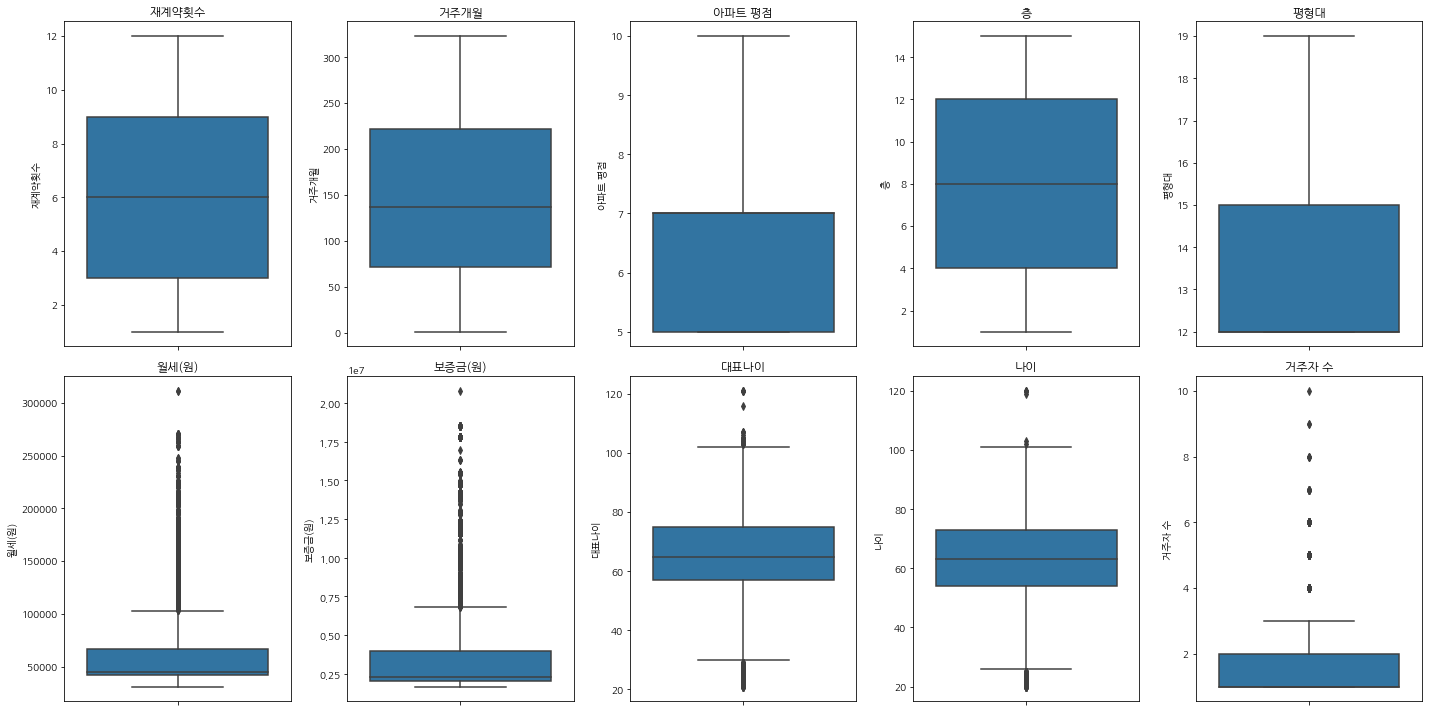

In [14]:
print("<수치형 변수별 이상치 개수>")
for col, up, down in iqr_df.values:
    cnt = len(df1_r.loc[(df1_r[col] > up) | (df1_r[col] < down)])
    print(f"{col}: {cnt}   [{(cnt/len(df1_r))*100:.2f} %]")
    
fig, ax = plt.subplots(2, 5, figsize=(20, 10))
for i, col in enumerate(n_cols):
    x = i // 5
    y = i % 5
    sns.boxplot(y=df1_r[col], ax=ax[x, y])  
    ax[x, y].set_title(col)
plt.tight_layout()
plt.show()

| 변수       | 이상치 비율 | 처리 권장               | 이유                                                  |
| -------- | ------ | ------------------- | --------------------------------------------------- |
| `월세(원)`  | 13.14% | **미처리** | 경제 변수는 이상치가 의미를 가질 수도 있음.(지역별, 주변환경, 경제 요인 등 외부 요인에 따라 차이) |
| `보증금(원)` | 13.15% | **미처리** | `월세`와 마찬가지.     |
| `대표나이`   | 1.01%  | **삭제**     | 비율 낮고 인위적 노이즈일 수 있음. 평균/중앙값 대체 또는 삭제 무방             |
| `나이`     | 0.88%  | **삭제**     | 위와 동일                                               |
| `거주자 수`  | 6.07%  | **대체 권장**           | 가족 수가 많은 경우일 수 있으나 현실적 범위 벗어난 경우만 대체(상위값을 대체)      |
| 그 외 변수들  | 0%     | 처리 필요 없음            | 이상치 없음                                              |


In [15]:
o_idx = []
rr_c = ['월세(원)', '보증금(원)']
for col, up, down in iqr_df.loc[iqr_df['index'].isin(rr_c)].values:
    o_idx.append(df1_r.loc[(df1_r[col] > up) | (df1_r[col] < down)].index.to_list())
o_idx = np.concatenate(o_idx)
df1_r['outter'] = np.where(df1_r.index.isin(o_idx), 1, 0)

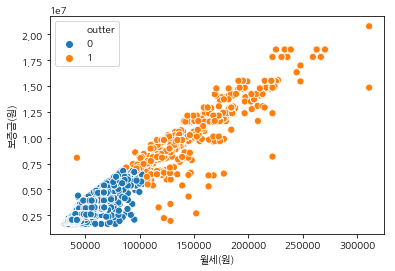

In [16]:
sns.scatterplot(x='월세(원)', y='보증금(원)', hue='outter', s=50, data=df1_r)
plt.show()

In [17]:
df1_r['outter'].value_counts()

0    8761
1    1387
Name: outter, dtype: int64

두 변수 중 하나라도 이상치에 해당하면 이상치로 레이블링을 하였다. ("1" 이면 이상치)  
정상치에 속하는 데이터들은 아래에 뭉쳐져 있다.  
경제변수이므로 크거나 작은 값이 유의미할 수 있다. 제거하지 않는다.

대표나이, 나이는 이상치를 삭제하고, 거주자 수는 이상치를 상위 값으로 보간해준다.

In [18]:
# 이상치 삭제: 대표나이, 나이
for col, up, down in iqr_df.loc[iqr_df['index'].isin(['대표나이', '나이'])].values:
    d_idx = df1_r.loc[(df1_r[col] > up) | (df1_r[col] < down)].index.to_list() #삭제할 컬럼 인덱스
    df1_r.drop(index=d_idx, axis=0, inplace=True)
# 이상치 보간: 거주자 수(3.5명은 없으므로 4로 보간)
df1_r['거주자 수'] = df1_r['거주자 수'].clip(upper=4)

In [19]:
df1_r.drop(columns='outter', axis = 1, inplace=True)

In [20]:
len(df1_r.columns)

18

#### 1- 4. 재계약 횟수의 중앙값을 기준으로 중앙값보다 크거나 같으면 '높음', 작으면 '낮음' 으로 하는 이분 변수를 구성하시오.
- 데이터 누수(lack)를 예방하기 위해, train/test set 분할 후 train_set의 중앙값을 기준으로 이분변수를 구성한다.

In [21]:
from sklearn.model_selection import train_test_split

Y = df1_r['재계약횟수']
X = df1_r.drop(columns='재계약횟수', axis=1)

train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.3, random_state=42)

train_X.shape, test_X.shape

((7012, 17), (3006, 17))

In [22]:
# 분할된 데이터에서 train_set 기준 중앙값으로 이분변수 구성
train_X['재계약수준'] = np.where(train_Y >= train_Y.median(), '높음', '낮음')
test_X['재계약수준'] = np.where(test_Y >= train_Y.median(), '높음', '낮음')

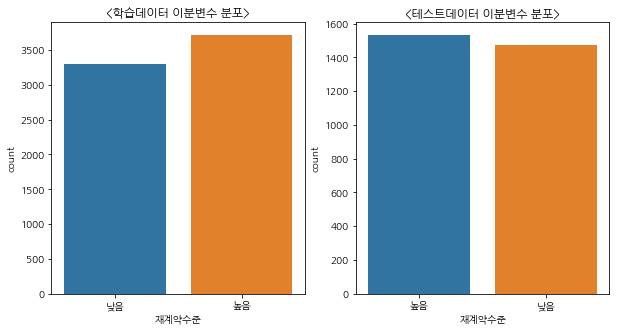

In [23]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

t_list = ['학습데이터', '테스트데이터']

for i, dt in enumerate([train_X, test_X]):
    sns.countplot(dt['재계약수준'], ax=ax[i])
    ax[i].set_title(f"<{t_list[i]} 이분변수 분포>")

plt.show()

In [24]:
train_X.columns

Index(['계약구분', '거주개월', '아파트 이름', '아파트 ID', '아파트 평점', '층', '평형대', '입주연도',
       '거주연도', '월세(원)', '보증금(원)', '대표나이', '나이', '성별', '결혼여부', '거주자 수', '퇴거여부',
       '재계약수준'],
      dtype='object')

#### 1- 5. 차원축소의 필요성을 논하고, 필요에 따라 차원을 축소하고 불필요하다면 그 근거를 논하시오.

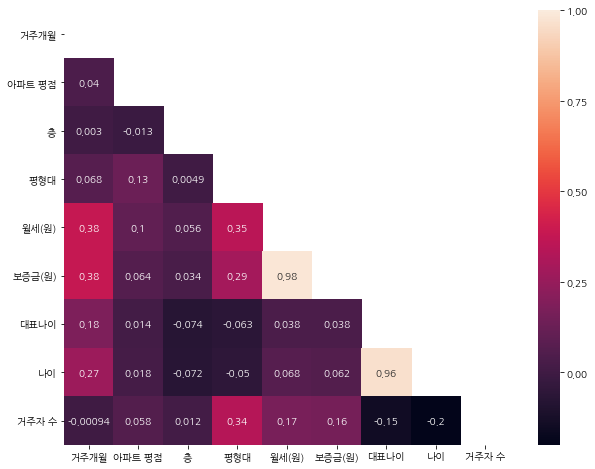

In [25]:
# 차원축소 판단을 하기 전 수치형 데이터 간의 상관관계를 확인한다. (일반적인 pearson corr를 사용)
#train set 사용
plt.figure(figsize=(10, 8))

corr = train_X[n_cols[1:]].corr()
mask = np.triu(np.ones_like(corr, dtype='bool'))

sns.heatmap(corr, mask=mask, annot=True)
plt.show()

수치형 데이터를 대상으로 한 선형 상관관계이다.  

차원 축소는 변수 간의 중복 정보 제거, 연산 속도 향상, 지도학습 모델 구축시 과적합 방지를 위해 활용할 수 있다. 차원 축소 기법 중 대표적인 방법으로 주성분분석(PCA)이 있으며, 차원 축소의 필요성은 각 변수 간의 상관관계를 보고 판단할 수 있다.

(월세(원), 보증금(원)), (대표나이, 나이)를 제외하고 낮은 상관관계를 가지므로 중복되는 정보를 가진 변수가 많다고 볼 수 없다.  
따라서 PCA를 실시하지 않는다.

#### 1-6. 재계약 횟수 이분 변수를 활용하여 세그먼트를 구분하고 각 세그먼트의 특징을 분석하시오.

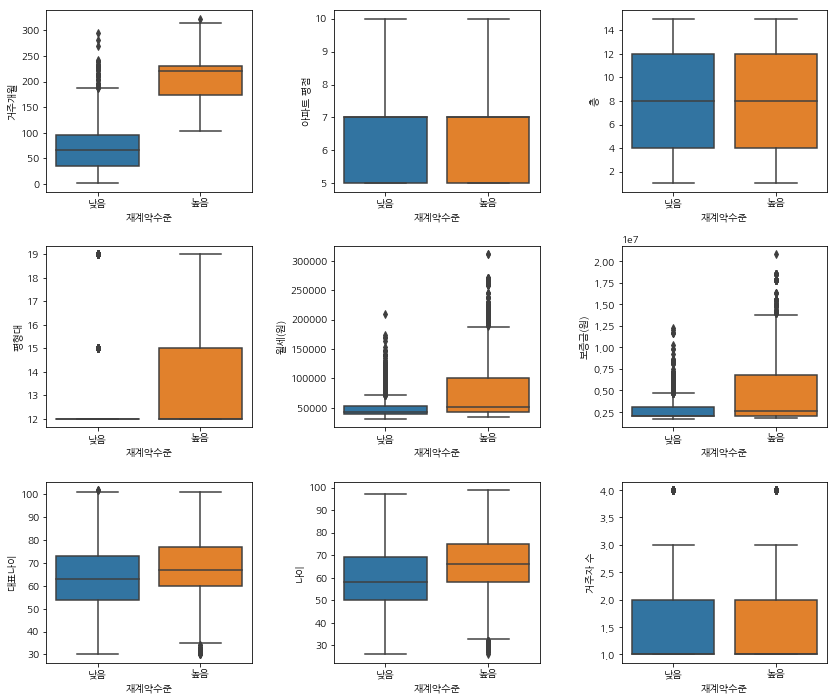

In [26]:
#수치형 데이터
fig, ax = plt.subplots(3, 3, figsize=(14, 12))

for i, col in enumerate(n_cols[1:]):
    x = i // 3
    y = i % 3
    sns.boxplot(data=train_X, x='재계약수준', y=col, ax=ax[x, y])
plt.subplots_adjust(wspace=0.4, hspace=0.3)
plt.show()

***수치형 데이터와 재계약 수준 간 특징 확인***
- 재계약수준이 높으면 거주개월도 긴 경향이 있다.
- 재계약 수준에 따른 아파트 평점은 차이가 없는 경향이 있다.
- 재계약 수준에 따른 층 차이가 없는 경향이 있다.
- 재계약 수준이 낮으면 평형대는 12평인 경향이 있다.
- 재계약 수준이 높을수록 월세(원)이 높아지는 경향이 있다.
- 재계약 수준이 높을수록 보증금(원)이 높아지는 경향이 있다.
- 재계약 수준이 높을수록 대표나이, 나이가 높은 경향이 있다.

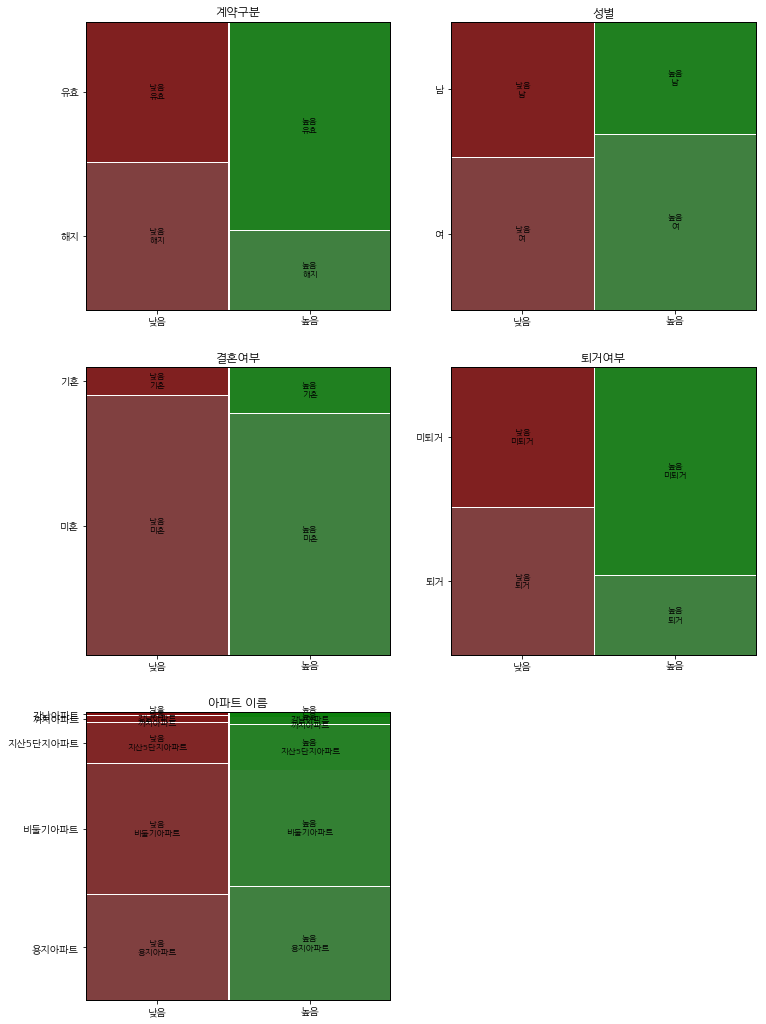

In [27]:
# 카테고리 데이터에 대한 이분 변수의 특징 비교
from statsmodels.graphics.mosaicplot import mosaic


fig, ax = plt.subplots(3, 2, figsize=(12, 18))
#아파트 ID와 아파트 이름은 동일한 데이터이니 시각화 용이를 위해 아파트 이름을 사용한다.
ca_cols = ['계약구분', '성별', '결혼여부', '퇴거여부', '아파트 이름']

for i, col in enumerate(ca_cols):
    x = i // 2
    y = i % 2
    mosaic(train_X, ["재계약수준", col], ax=ax[x, y])
    ax[x, y].set_title(col)
plt.subplots_adjust(wspace=0.2, hspace=0.2)
ax[2, 1].remove()
plt.show()

***카테고리 데이터와 재계약 수준 간 특징 확인***
- 재계약 수준이 높으면 계약 해지 비율이 낮아지는 경향이 있다.
- 여성의 재계약 수준이 높은 경향이 있다. 
- 재계약 수준과 결혼 유무는 경향성을 찾기 어렵다.
- 재계약 수준이 높으면 미퇴거 비율이 높아지는 경향이 있다.

#### 1- 7. 재계약 횟수 이분 변수를 종속변수로 하는 회귀 분석을 두 가지 이상의 방법론을 통해 수행하고 최종 모델을 결정하시오.
- LGBM: 속도와 정확도를 모두 고려한 트리 기반 머신러닝 알고리즘
- Randomforest: 배깅 기반 앙상블 모델, 여기서는 분류모형을 사용

In [28]:
# 재계약수준을 새로운 종속변수로 정의
train_Y2, test_Y2 = train_X['재계약수준'], test_X['재계약수준']
train_X2, test_X2 = train_X.drop(columns=['재계약수준', '아파트 ID'], axis=1), test_X.drop(columns=['재계약수준', '아파트 ID'], axis=1)

In [29]:
train_X2.head(2)

,계약구분,거주개월,아파트 이름,아파트 평점,층,평형대,입주연도,거주연도,월세(원),보증금(원),대표나이,나이,성별,결혼여부,거주자 수,퇴거여부
47090,해지,117,용지아파트,7.0,14,12,2003,2012,77700.0,5340000,66,57,여,미혼,3,퇴거
71296,해지,104,용지아파트,7.0,15,12,2002,2010,57200.0,2794000,54,43,여,미혼,3,퇴거


In [30]:
n_cols

['재계약횟수',
 '거주개월',
 '아파트 평점',
 '층',
 '평형대',
 '월세(원)',
 '보증금(원)',
 '대표나이',
 '나이',
 '거주자 수']

In [31]:
# 수치형 데이터는 스케일링, 카테고리 데이터는 one-hot
from sklearn.preprocessing import StandardScaler

c_cols = ['계약구분', '성별', '결혼여부', '퇴거여부', '아파트 이름']

#수치형 데이터 스케일링
scaler = StandardScaler()

train_X2[n_cols[1:]] = scaler.fit_transform(train_X2[n_cols[1:]])
test_X2[n_cols[1:]] = scaler.transform(test_X2[n_cols[1:]])

# 카테고리 변수 one-hot: 더미 함수이용

train_X2 = pd.get_dummies(train_X2, columns=c_cols, drop_first=False)
test_X2 = pd.get_dummies(test_X2, columns=c_cols, drop_first=False)
test_X2 = test_X2.reindex(columns=train_X2.columns, fill_value=0)

In [32]:
# 높으면 1, 낮으면 0
train_Y2, test_Y2 = np.where(train_Y2 == '높음', 1, 0), np.where(test_Y2 == '높음', 1, 0)

In [33]:
train_X2.shape, test_X2.shape

((7012, 24), (3006, 24))

In [34]:
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import confusion_matrix, classification_report

# 두 모델 정의 
rf = RandomForestClassifier(random_state=42)
lgbm = LGBMClassifier(random_state=42)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

rf_p = {'n_estimators': [50, 100], 'max_depth': [3, 5], 'min_samples_split': [2, 5]}
lgbm_p = {'learning_rate': np.arange(0.01, 0.3, 0.02)}

# 랜덤 포레스트
rf_grid = GridSearchCV(
    estimator = rf, 
    param_grid = rf_p, 
    scoring = 'f1', 
    cv = kf
)
# LGBM
lgbm_grid = GridSearchCV(
    estimator = lgbm, 
    param_grid = lgbm_p, 
    scoring = 'f1', 
    cv = kf
)

rf_grid.fit(train_X2, train_Y2)
lgbm_grid.fit(train_X2, train_Y2)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LGBMClassifier(random_state=42),
             param_grid={'learning_rate': array([0.01, 0.03, 0.05, 0.07, 0.09, 0.11, 0.13, 0.15, 0.17, 0.19, 0.21,
       0.23, 0.25, 0.27, 0.29])},
             scoring='f1')

In [35]:
#랜덤 포레스트 

print(f"Best param: {rf_grid.best_params_}")
print(f"Best socre: {rf_grid.best_score_:.2f}")


pred_train = rf_grid.predict(train_X2)
pred_test = rf_grid.predict(test_X2)

print("\n< 학습 데이터 성능 >")
con1 = pd.DataFrame(confusion_matrix(train_Y2, pred_train, labels=[0, 1]), index=['실제 낮음', '실제 높음'], columns=['예측 낮음', '예측 높음'])
display(con1)
print(f"{classification_report(train_Y2, pred_train)}")

print("< 테스트 데이터 성능 >")
con2 = pd.DataFrame(confusion_matrix(test_Y2, pred_test, labels=[0, 1]), index=['실제 낮음', '실제 높음'], columns=['예측 낮음', '예측 높음'])
display(con2)
print(f"{classification_report(test_Y2, pred_test)}")

Best param: {'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 50}
Best socre: 0.97

< 학습 데이터 성능 >


,예측 낮음,예측 높음
실제 낮음,3138,159
실제 높음,41,3674


              precision    recall  f1-score   support

           0       0.99      0.95      0.97      3297
           1       0.96      0.99      0.97      3715

    accuracy                           0.97      7012
   macro avg       0.97      0.97      0.97      7012
weighted avg       0.97      0.97      0.97      7012

< 테스트 데이터 성능 >


,예측 낮음,예측 높음
실제 낮음,1405,68
실제 높음,20,1513


              precision    recall  f1-score   support

           0       0.99      0.95      0.97      1473
           1       0.96      0.99      0.97      1533

    accuracy                           0.97      3006
   macro avg       0.97      0.97      0.97      3006
weighted avg       0.97      0.97      0.97      3006



In [36]:
#lgbm

print(f"Best param: {lgbm_grid.best_params_}")
print(f"Best socre: {lgbm_grid.best_score_:.2f}")


pred_train = lgbm_grid.predict(train_X2)
pred_test = lgbm_grid.predict(test_X2)

print("\n< 학습 데이터 성능 >")
con1 = pd.DataFrame(confusion_matrix(train_Y2, pred_train, labels=[0, 1]), index=['실제 낮음', '실제 높음'], columns=['예측 낮음', '예측 높음'])
display(con1)
print(f"{classification_report(train_Y2, pred_train)}")

print("< 테스트 데이터 성능 >")
con2 = pd.DataFrame(confusion_matrix(test_Y2, pred_test, labels=[0, 1]), index=['실제 낮음', '실제 높음'], columns=['예측 낮음', '예측 높음'])
display(con2)
print(f"{classification_report(test_Y2, pred_test)}")

Best param: {'learning_rate': 0.10999999999999997}
Best socre: 0.98

< 학습 데이터 성능 >


,예측 낮음,예측 높음
실제 낮음,3297,0
실제 높음,0,3715


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3297
           1       1.00      1.00      1.00      3715

    accuracy                           1.00      7012
   macro avg       1.00      1.00      1.00      7012
weighted avg       1.00      1.00      1.00      7012

< 테스트 데이터 성능 >


,예측 낮음,예측 높음
실제 낮음,1429,44
실제 높음,7,1526


              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1473
           1       0.97      1.00      0.98      1533

    accuracy                           0.98      3006
   macro avg       0.98      0.98      0.98      3006
weighted avg       0.98      0.98      0.98      3006



두 모델 모두 학습 데이터, 테스트 데이터에서 정확도(accuracy) 0.97 이상으로 높은 성능을 보여주고 있다.  
정확도 뿐만 아니라 두 레이블의 recall, precision, f1 score 또한 높다.  

그 중 lgmb은 학습데이터의 경우, 두 레이블을 정확하게 분류해 내었으며, 테스트 데이터의 경우 accuracy 0.98로 랜덤포레스트보다  
높은 성능을 보이므로 lgbm을 채택한다.

**모델 성능(accuracy/f1 score)**
1. RandomForest
  - 학습데이터: 0.97, 0.97
  - 테스트데이터: 0.97, 0.97
2. LGBM
  - 학습데이터: 1.0, 1.0
  - 테스트데이터: 0.98, 0.98

#### 1- 8. 최종 채택한 모델에서 각각 유의하게 작용하는 변수를 확인하고 설명하시오.

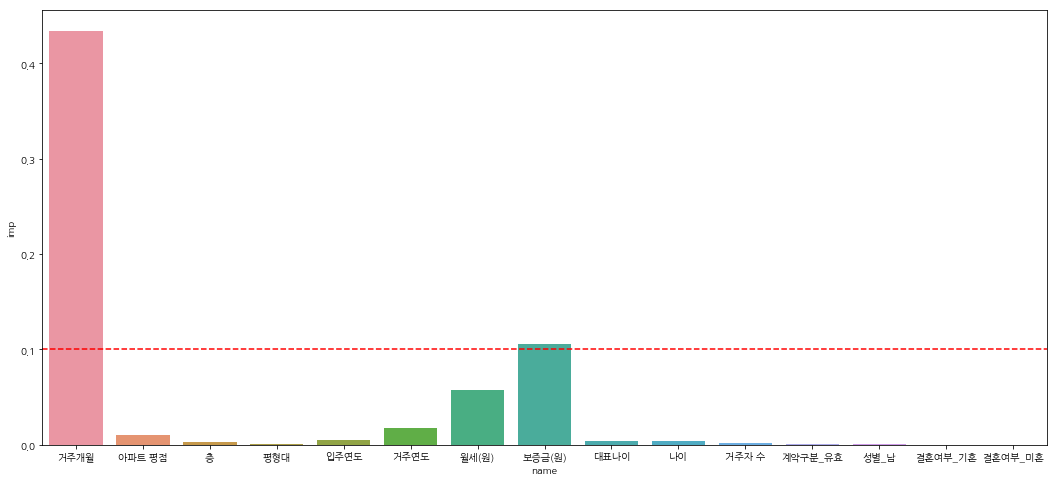

In [37]:
from sklearn.inspection import permutation_importance

f_imp = permutation_importance(lgbm_grid, train_X2, train_Y2, n_repeats=10, random_state=42)

feats = train_X2.columns
f_importance = f_imp.importances_mean

f_imp_df = pd.DataFrame({"name": feats, "imp": f_importance})
f_imp_df = f_imp_df.loc[f_imp_df['imp'] > 0]

plt.figure(figsize=(18, 8))

sns.barplot(data = f_imp_df, x='name', y='imp')
plt.axhline(y=0.1, color='r', linestyle='--') #변수중요도가 10% 이상인 변수만 사용
plt.show()

성능이 좋았던 LGBM 모델을 기준으로 변수 중요도를 분석해보았다.  
모델에 유의하게 영향을 미치는 변수 중요도 임계치를 임의로 10%(0.1)로 지정하였을 시,  
거주개월과 보증금(원)이 모델에 유의한 영향을 미치는 변수임을 확인할 수 있다.  
만약 과적합이 발생하거나 하여 차원축소나 변수 정규화를 고려해야 할 시 해당 변수를 선택하고, 중요도가 매우 낮은 변수를 제외하는  
방법을 채택할 수 있을 것이다.

#### 1- 9. 해당 데이터 분석결과로 얻을 수 있는 점을 제시하시오.

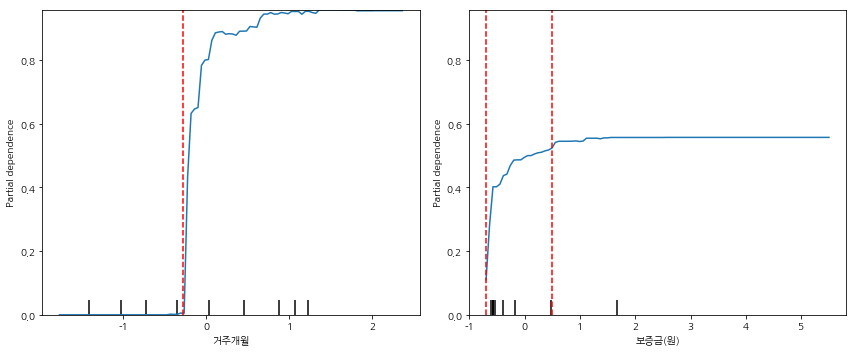

In [38]:
from sklearn.inspection import partial_dependence, plot_partial_dependence

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

plot_partial_dependence(estimator = lgbm_grid, 
                        X = train_X2,
                        features = ['거주개월', '보증금(원)'], 
                        target = train_Y2, 
                        percentiles = (0, 1), 
                        ax = ax)
ax[0].axvline(x=-0.28, color='r', linestyle='--')
ax[1].axvline(x=-0.7, color='r', linestyle='--')
ax[1].axvline(x=0.5, color='r', linestyle='--')
plt.tight_layout()
plt.show()

In [39]:
origin = scaler.inverse_transform(train_X2[n_cols[1:]])[:, [0, 5]]
scaled = train_X2[n_cols[1:]][['거주개월', '보증금(원)']]

vs = pd.DataFrame(np.concatenate([origin, scaled], axis=1), 
                  columns=['거주개월(원본)', '보증금(원)(원본)', '거주개월(스케일)', '보증금(원)(스케일)'])

display(vs.loc[(vs['거주개월(스케일)'] >= -0.28), ['거주개월(스케일)', '거주개월(원본)']].sort_values(by='거주개월(원본)').head(3))
display(vs.loc[(vs['보증금(원)(스케일)'] >= -0.7), ['보증금(원)(스케일)', '보증금(원)(원본)']].sort_values(by='보증금(원)(원본)').head(3))

,거주개월(스케일),거주개월(원본)
1511,-0.269094,118.0
5455,-0.269094,118.0
1371,-0.269094,118.0


,보증금(원)(스케일),보증금(원)(원본)
5279,-0.695637,1670000.0
2422,-0.695637,1670000.0
1484,-0.695637,1670000.0


In [40]:
display(vs.loc[(vs['보증금(원)(스케일)'] >= 0.5), ['보증금(원)(스케일)', '보증금(원)(원본)']].sort_values(by='보증금(원)(원본)').head(3))

,보증금(원)(스케일),보증금(원)(원본)
4794,0.503279,5368000.0
4696,0.510088,5389000.0
4260,0.510088,5389000.0


- 거주개월 약 118개월부터 거주기간이 늘어날 수록 재계약 수준이 높아질 확률이 급격히 늘어난다. 
- 보증금(원)이 16,7000 부터 재계약 수준이 높아질 확률이 급격하게 늘어다가 이후 536,8000원 이후부터는 평이한 경향을 보임.
- 월세(원)도 보증금(원)과 유사한 경향을 보이기 때문에, 월세(원)이 늘어날 경우 재계약 수준이 높아지는 경향이 있을 것이다.

**전략**  
너무 낮지 않은 합리적인 보증금(원), 월세(원)을 설정하고, 리모델링이나 방 컨디션을 좋게 유지하여 거주개월을 늘리고  
재계약률을 높일 수 있을 것이다.

**Data description**

경기 당 9이닝 동안 1번 타자, 2번 타자의 출루 정보를 기록한 데이터입니다.  

1: 1루타  
2: 2루타  
3: 3루타  
4: 홈런  
5: 삼진 제외 모든 아웃  
6: 볼넷  
7: 삼진  
8: 몸에 맞는 공  
9: 희생 번트  

**타자 행동**

| 컬럼명   | 의미 (회 == 이닝)    |
|----------|----------------------|
| **a1_1** | 1회 첫 타자 행동     |
| **a1_2** | 1회 둘째 타자 행동   |
| **a2_1** | 2회 첫 타자 행동     |
| **a2_2** | 2회 둘째 타자 행동   |
| **a3_1** | 3회 첫 타자 행동     |
| **a3_2** | 3회 둘째 타자 행동   |
| **a4_1** | 4회 첫 타자 행동     |
| **a4_2** | 4회 둘째 타자 행동   |
| **a5_1** | 5회 첫 타자 행동     |
| **a5_2** | 5회 둘째 타자 행동   |
| **a6_1** | 6회 첫 타자 행동     |
| **a6_2** | 6회 둘째 타자 행동   |
| **a7_1** | 7회 첫 타자 행동     |
| **a7_2** | 7회 둘째 타자 행동   |
| **a8_1** | 8회 첫 타자 행동     |
| **a8_2** | 8회 둘째 타자 행동   |
| **a9_1** | 9회 첫 타자 행동     |
| **a9_2** | 9회 둘째 타자 행동   |

**득점** 

| 컬럼명 | 의미 (회 == 이닝)   |
|--------|---------------------|
| **b1** | 1회 총 득점수       |
| **b2** | 2회 총 득점수       |
| **b3** | 3회 총 득점수       |
| **b4** | 4회 총 득점수       |
| **b5** | 5회 총 득점수       |
| **b6** | 6회 총 득점수       |
| **b7** | 7회 총 득점수       |
| **b8** | 8회 총 득점수       |
| **b9** | 9회 총 득점수       |

In [41]:
df2 = pd.read_csv('https://raw.githubusercontent.com/qiwerr1004/ADP_go/main/29/problem2.csv')
df2.info()
display(df2.head(2))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 28 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   game_id  200 non-null    int64  
 1   a1_1     188 non-null    float64
 2   a1_2     200 non-null    int64  
 3   a2_1     200 non-null    object 
 4   a2_2     200 non-null    int64  
 5   a3_1     200 non-null    int64  
 6   a3_2     200 non-null    int64  
 7   a4_1     200 non-null    object 
 8   a4_2     200 non-null    int64  
 9   a5_1     200 non-null    int64  
 10  a5_2     200 non-null    int64  
 11  a6_1     200 non-null    int64  
 12  a6_2     200 non-null    int64  
 13  a7_1     200 non-null    object 
 14  a7_2     200 non-null    int64  
 15  a8_1     200 non-null    int64  
 16  a8_2     200 non-null    int64  
 17  a9_1     200 non-null    int64  
 18  a9_2     200 non-null    int64  
 19  b1       200 non-null    int64  
 20  b2       200 non-null    int64  
 21  b3       200 non

,game_id,a1_1,a1_2,a2_1,a2_2,a3_1,a3_2,a4_1,a4_2,a5_1,...,a9_2,b1,b2,b3,b4,b5,b6,b7,b8,b9
0,201900016,5.0,5,5,5,5,5,5,5,5,...,5,0,0,0,0,0,0,0,4,2
1,201900023,6.0,4,5,5,2,5,1,1,6,...,7,3,0,0,1,0,1,3,1,0


#### 2-1. 각 회차별로 1번 타자의 출루 (1,2,3루타와 사사구(볼넷, 몸에맞는공))가 있는 경우에 대해 득점이 발생 했는지 확인하고자 한다.  
     이를 위한 전처리를 수행하시오. (단, 첫 번째 혹은 두 번째 타자가 홈런을 친 경우 해당 회차 데이터 제외)

In [42]:
# 먼저 결측치 여부 확인
df2.isna().sum()

game_id     0
a1_1       12
a1_2        0
a2_1        0
a2_2        0
a3_1        0
a3_2        0
a4_1        0
a4_2        0
a5_1        0
a5_2        0
a6_1        0
a6_2        0
a7_1        0
a7_2        0
a8_1        0
a8_2        0
a9_1        0
a9_2        0
b1          0
b2          0
b3          0
b4          0
b5          0
b6          0
b7          0
b8          0
b9          0
dtype: int64

1번 타자의 1회차 행동에 12개의 결측치가 있다.  
이는 전체 데이터의 6%를 차지하는데, 같은 타자라도 각 회차별 행동은 다르므로 다른회차에서 보간이 적절치 않을 것으로 판단,  
결측 데이터를 삭제한다.

In [43]:
df2 = df2.dropna()

모두 수치형 변수이나 일부 변수(컬럼)이 object로 유효하지 않은 값이 존재할 것으로 보인다.

In [44]:
e_cols = df2.select_dtypes('O').columns

ev_df = pd.DataFrame([df2[col].value_counts().index.to_list() for col in e_cols]).T
ev_df.columns = e_cols

ev_df

,a2_1,a4_1,a7_1
0,5,5,5
1,7,7,7
2,1,1,1
3,6,6,6
4,4,2,2
5,2,4,4
6,:,&,""""
7,None,8,8
8,None,3,3


3개의 변수에서 :, &, " 문자열을 식별하였다.   
데이터셋 생성 과정의 오류로 판단되며, 해당값은 제거해준다. 

In [45]:
df2 = df2[~df2[e_cols].isin([':', '&', '"']).any(axis=1)]
df2.head(2)

,game_id,a1_1,a1_2,a2_1,a2_2,a3_1,a3_2,a4_1,a4_2,a5_1,...,a9_2,b1,b2,b3,b4,b5,b6,b7,b8,b9
0,201900016,5.0,5,5,5,5,5,5,5,5,...,5,0,0,0,0,0,0,0,4,2
1,201900023,6.0,4,5,5,2,5,1,1,6,...,7,3,0,0,1,0,1,3,1,0


In [46]:
df2[e_cols] = df2[e_cols].astype('int64')

이제 결측치와 이상값 처리는 완료되었다.  
1번 타자와 득점률에 해당하는 새로운 데이터셋을 생성한 후 그 중 특정조건(1, 2, 3, 볼넷, 몸맞) 을 만족하는 데이터만 필터링한다.  
(단, 첫 번째 혹은 두 번째 타자가 홈런을 친 경우 해당 회차 데이터 제외)  
이후 득점률과의 관계를 분석한다.

In [92]:
s_1 = [f for f in df2.columns if '_1' in f] # 1번 타자의 컬럼명
s_2 = [f for f in df2.columns if '_2' in f]
b = [f for f in df2.columns if 'b' in f] # 득점정보 컬럼명

p1 = pd.melt(df2,
             id_vars=['game_id'],
             value_vars=s_1, #값으로 변환할 컬럼리스트(1번 타자 해당 컬럼)
             var_name = 'no', #값으로 변환할 컬럼의 이름
             value_name = 'action1', #값으로 들어갈 컬럼의 이름
             ignore_index=False)


p2 = pd.melt(df2,
             id_vars=['game_id'],
             value_vars=s_2, #값으로 변환할 컬럼리스트(2번 타자 해당 컬럼)
             var_name = 'no', #값으로 변환할 컬럼의 이름
             value_name = 'action2', #값으로 들어갈 컬럼의 이름
             ignore_index=False)


bb =  pd.melt(df2,
             id_vars=['game_id'],
             value_vars=b, #값으로 변환할 컬럼리스트(득점)
             var_name = 'no', #값으로 변환할 컬럼의 이름
             value_name = 'score', #값으로 들어갈 컬럼의 이름
             ignore_index=False)

p1['no'] = [s.split('_')[0][-1] for s in p1['no']]
p2['no'] = [s.split('_')[0][-1] for s in p2['no']]
bb['no'] = [s.split('_')[0][-1] for s in bb['no']]

rs = pd.merge(p1, p2, on=['game_id', 'no'], how='inner')
rs = pd.merge(rs, bb, on=['game_id', 'no'], how='inner')

rs = rs.sort_values(by=['game_id', 'no'])

In [93]:
rs.head(9)
print(f'총 데이터 개수: {len(rs)}')

총 데이터 개수: 1620


#### 데이터 필터링

In [96]:
# 1번 타자의 출루 (1,2,3루타와 사사구(볼넷, 몸에맞는공))가 있는 경우 데이터
# 첫 번째 혹은 두 번째 타자가 홈런을 친 경우 해당 회차 데이터를 제외
rs = rs.loc[rs['action1'].isin([1, 2, 3, 6, 8])]
rs = rs.loc[(rs['action1'] != 4) & (rs['action2'] != 4)]

In [97]:
display(rs.head())
print(f'총 데이터 개수: {len(rs)}')

,game_id,no,action1,action2,score
1260,201900016,8,1.0,1,4
1440,201900016,9,1.0,5,2
361,201900023,3,2.0,5,0
541,201900023,4,1.0,1,1
721,201900023,5,6.0,5,0


총 데이터 개수: 480


In [100]:
# 득점 발생 유무에 대한 2class 파생변수 생성
rs['is_score'] = np.where(rs['score'] > 0, 1, 0)

#### 2-2. Logistic Regression을 적용하고 (득점의) 2번타자의 희생번트 여부에 대한 회귀 계수 검정을 실시하시오.

In [101]:
#2번 타자의 희생번트 유무 파생변수 생성
rs['hb'] = np.where(rs['action2'] == 9, 1, 0)
rs.head(3)

,game_id,no,action1,action2,score,is_score,hb
1260,201900016,8,1.0,1,4,1,0
1440,201900016,9,1.0,5,2,1,0
361,201900023,3,2.0,5,0,0,0


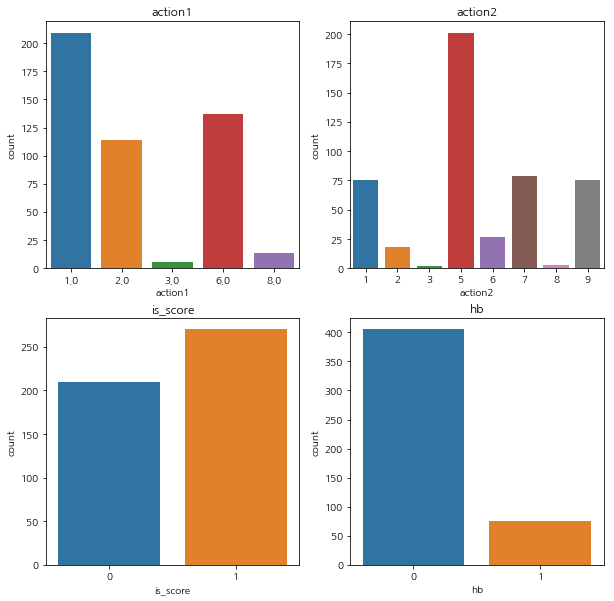

In [102]:
# 각 사용 설명변수별 count plot
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

for i, col in enumerate(['action1', 'action2', 'is_score', 'hb']):
    x = i // 2
    y = i % 2
    sns.countplot(rs[col], ax=ax[x, y])
    ax[x, y].set_title(col)
plt.show()

In [103]:
#로지스틱회귀모형
import statsmodels.formula.api as smf

model = smf.logit("is_score ~ C(action1)+C(hb)",  #hb에 이미 2번 타자의 정보가 포함되므로 action2x
                 data = rs).fit(maxiter=100, method='newton')
model.summary()

Optimization terminated successfully.
         Current function value: 0.670534
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               is_score   No. Observations:                  480
Model:                          Logit   Df Residuals:                      474
Method:                           MLE   Df Model:                            5
Date:                Sun, 22 Jun 2025   Pseudo R-squ.:                 0.02157
Time:                        23:03:29   Log-Likelihood:                -321.86
converged:                       True   LL-Null:                       -328.95
Covariance Type:            nonrobust   LLR p-value:                   0.01446
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.0040      0.147      0.027      0.978      -0.284       0.292
C(action1)[T.2.0]     0.4193      0.240      1.744      0.081      -0.052       0.890
C(action1)[T.3.0]     1.6054      1.105      1.453      0.146      -0.561       3.772
C(action1)[T.6.0]     0.1795      0.223      0.803      0.422      -0.258       0.617
C(action1)[T.8.0]    -0.6964      0.579     -1.203      0.229      -1.831       0.438
C(hb)[T.1]            0.6885      0.273      2.526      0.012       0.154       1.223
=====================================================================================
"""

해당 로지스틱 회귀 분석은 득점여부와 번트와의 상관관계를 알기 위한 문제이다.  
여기서 설명변수로 action2, score는 제외해주는데, action2는 hb에 정보가 포함되어 있고,  
score는 종속변수인 is_score와 마찬가지의 정보를 담고 있기 때문이다.  
**유의수준 5% 하에서**  
- H0(귀무가설): 2번 타자의 희생번트 여부는 득점과 통계적 유의성이 없다.(hb의 회귀계수가 0이다.)
- H1(대립가설): 2번 타자의 희생번트 여부는 득점과 통계적 유의성이 있다.(hb의 회귀계수가 0이 아니다.)

**모델결과 분석**  
유의수준 5%(신뢰구간 95%) 하에서 hb(2번 타자의 희생번트 유무)의 p-value는 0.012로 0.05보다 작아서  
귀무가설을 기각한다. 
***따라서 2번 타자의 희생번트 유무와 득점 여부는 통계적으로 유의성이 있다.***

#### 2-3. SMOTE (random_state =0 지정)를 적용하여 data imbalance를 해결하시오.

In [115]:
# 득점유무: y(is_score)
# 설명변수: action1, action2 - 둘다 카테고리 데이터
from imblearn.over_sampling import SMOTE
from collections import Counter

Y = rs['is_score']
X = rs[['action1', 'hb']].astype('category')

# 데이터 7:3분할
from sklearn.model_selection import train_test_split

train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.3, random_state=0)

#리샘플링
smt = SMOTE(random_state=0)
train_X, train_Y = smt.fit_resample(train_X, train_Y)
print(f"각 레이블 갯수: {Counter(train_Y)}")

각 레이블 갯수: Counter({1: 191, 0: 191})


In [116]:
train_X = pd.DataFrame(train_X, columns = ['action1', 'hb']).astype('category')

#### 2-4. Logistic Regression을 적용하고 결과를 분석하시오.

In [117]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import KFold, GridSearchCV
from imblearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import ColumnTransformer

#전처리
cat_process = make_pipeline(OneHotEncoder(handle_unknown='ignore'))
preprocess = ColumnTransformer([('cat', cat_process, train_X.columns)], remainder="passthrough")
# 전처리+모델
l_pipe = Pipeline(
    [
        ('preprocess', preprocess), 
        ('classifier', LogisticRegression(random_state=0))
    ]
)
kf = KFold(n_splits=5, shuffle=True, random_state=0)
lr_param = {
    'classifier__penalty': ['l1', 'l2'],
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'classifier__class_weight': [None, 'balanced'],
    'classifier__max_iter': [200, 500, 1000]
}

lr_model = GridSearchCV(
    estimator = l_pipe, 
    scoring = 'f1', 
    param_grid = lr_param,
    cv = kf
)

lr_model.fit(train_X, train_Y)

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('cat',
                                                                         Pipeline(steps=[('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         Index(['action1', 'hb'], dtype='object'))])),
                                       ('classifier',
                                        LogisticRegression(random_state=0))]),
             param_grid={'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'classifier__class_weight': [None, 'balanced'],
                         'classifier__max_iter': [200, 500, 1000],
            

In [118]:
print(f"Logistic regression Best Model: \n- param: {lr_model.best_params_}\n- score: {lr_model.best_score_:.3f}")

train_pred = lr_model.predict(train_X)
test_pred = lr_model.predict(test_X)

print(f"train_set")

cm_1 = pd.DataFrame(confusion_matrix(train_Y, train_pred, labels=[0, 1]), index=['AF', 'AT'], columns=['PF', 'PT'])
print(f"{display(cm_1)}")
print(f"{classification_report(train_Y, train_pred)}")

print(f"test_set")
cm_2 = pd.DataFrame(confusion_matrix(test_Y, test_pred, labels=[0, 1]), index=['AF', 'AT'], columns=['PF', 'PT'])
print(f"{display(cm_2)}")
print(f"{classification_report(test_Y, test_pred)}")

Logistic regression Best Model: 
- param: {'classifier__C': 10, 'classifier__class_weight': 'balanced', 'classifier__max_iter': 200, 'classifier__penalty': 'l2'}
- score: 0.563
train_set


,PF,PT
AF,85,106
AT,64,127


None
              precision    recall  f1-score   support

           0       0.57      0.45      0.50       191
           1       0.55      0.66      0.60       191

    accuracy                           0.55       382
   macro avg       0.56      0.55      0.55       382
weighted avg       0.56      0.55      0.55       382

test_set


,PF,PT
AF,26,39
AT,29,50


None
              precision    recall  f1-score   support

           0       0.47      0.40      0.43        65
           1       0.56      0.63      0.60        79

    accuracy                           0.53       144
   macro avg       0.52      0.52      0.51       144
weighted avg       0.52      0.53      0.52       144



Logistic Regression 결과이다. 평가지표는 f1 score를 사용한다.(recall도 확인) 
- train_set: 0.69
- test_set: 0.68

train, test set 전반적으로 성능은 낮지만, 균일한 성능을 보이고 있다.

#### 2-5. XGBoost 적용하고 결과를 분석하시오.

In [119]:
from xgboost import XGBClassifier

# 전처리+모델
x_pipe = Pipeline(
    [
        ('preprocess', preprocess), 
        ('classifier', XGBClassifier(random_state=0))
    ]
)
kf = KFold(n_splits=5, shuffle=True, random_state=0)
Xgb_param = {'classifier__learning_rate': np.arange(0.01, 0.2, 0.01)}

xgb_model = GridSearchCV(
    estimator = x_pipe, 
    scoring = 'f1', 
    param_grid = Xgb_param,
    cv = kf
)

xgb_model.fit(train_X, train_Y)

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('cat',
                                                                         Pipeline(steps=[('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         Index(['action1', 'hb'], dtype='object'))])),
                                       ('classifier', XGBClassifier())]),
             param_grid={'classifier__learning_rate': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19])},
             scoring='f1')

In [120]:
print(f"XGB Calssifier Best Model: \n- param: {xgb_model.best_params_}\n- score: {xgb_model.best_score_:.3f}")

train_pred = xgb_model.predict(train_X)
test_pred = xgb_model.predict(test_X)

print(f"train_set")

cm_1 = pd.DataFrame(confusion_matrix(train_Y, train_pred, labels=[0, 1]), index=['AF', 'AT'], columns=['PF', 'PT'])
print(f"{display(cm_1)}")
print(f"{classification_report(train_Y, train_pred)}")

print(f"test_set")
cm_2 = pd.DataFrame(confusion_matrix(test_Y, test_pred, labels=[0, 1]), index=['AF', 'AT'], columns=['PF', 'PT'])
print(f"{display(cm_2)}")
print(f"{classification_report(test_Y, test_pred)}")

XGB Calssifier Best Model: 
- param: {'classifier__learning_rate': 0.18000000000000002}
- score: 0.507
train_set


,PF,PT
AF,104,87
AT,76,115


None
              precision    recall  f1-score   support

           0       0.58      0.54      0.56       191
           1       0.57      0.60      0.59       191

    accuracy                           0.57       382
   macro avg       0.57      0.57      0.57       382
weighted avg       0.57      0.57      0.57       382

test_set


,PF,PT
AF,27,38
AT,39,40


None
              precision    recall  f1-score   support

           0       0.41      0.42      0.41        65
           1       0.51      0.51      0.51        79

    accuracy                           0.47       144
   macro avg       0.46      0.46      0.46       144
weighted avg       0.47      0.47      0.47       144



XGB Classifier 결과이다. 평가지표는 f1 score를 사용한다.(recall도 확인) 
- train_set: 0.66
- test_set: 0.57

train set에 비해 test_set의 성능이 낮다.

두 모델을 비교했을 시 로지스틱 회귀분석의 결과가 더 높으며 train/test set 모두 균일한 성능을 보이므로 해당 모델을 채택한다.

#### 3. 제품 A의 불량률은 0.03이다. 25개의 제품을 뽑았을 때 3개가 불량일 확률을 구하시오(소수점 다섯째 자리에서 반올림)
- 이항분포 문제이다.
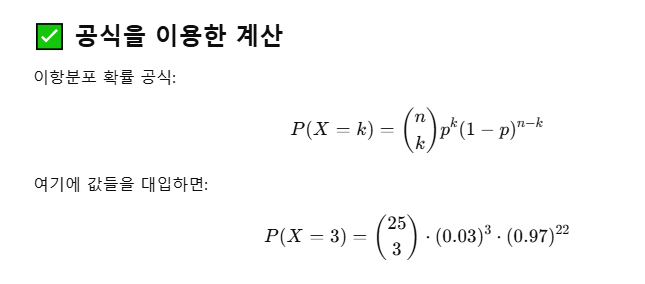

In [62]:
from scipy.stats import binom

n = 25 
k = 3
p = 0.03 

prob = binom.pmf(k, n, p)

print(f"3개가 불량일 확률: {prob:.4f}")

3개가 불량일 확률: 0.0318


### 4. C사 생산 제품 1000개 중 양품이 600개, D사 생산 제품 500개 중 양품이 200개 이다. 두 회사의 양품률에 차이가 있는지 검정하시오.

이 문제는 두 집단의 비율 차이에 대한 가설검정 문제(C사와 D사의 양품률 차이가 통계적으로 유의미한가?)

**1. 가설수립**
- H0: 두 회사의 양품률에 차이가 없다.(p_c == p_d)
- H1: 두 회사의 양품률에 차이가 있다.(p_c != p_d)

**2. Z검정(두 집단이 동일분산을 가질 경우) 검정통계량 확인**
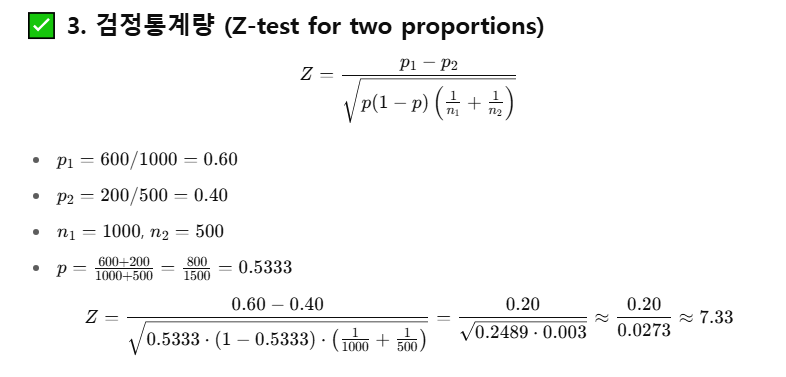

**3. 유의수준 5% 하 양측검정 실시**  
C사를 기준으로 할 때, D사의 양품률이 크거나 작을 수 있기 때문에 양측검정 실시

In [63]:
from scipy.stats import norm

p1 = 600/1000
p2 = 200/500
p = (600+200)/(1000+500)

z_score = (p1-p2) / np.sqrt(p*(1-p)*((1/1000)+(1/500)))

p_value = 2*(1-norm.cdf(abs(z_score)))

print(f"z 검정통계량: {z_score:.3f}")
print(f"p_value {p_value:.3f}로 유의수준 5% 하에서 귀무가설을 기각할 수", "있다.(양품률 차이있음)" if p_value < 0.05 else "없다.(양품률 차이없음)")

z 검정통계량: 7.319
p_value 0.000로 유의수준 5% 하에서 귀무가설을 기각할 수 있다.(양품률 차이있음)


In [64]:
from statsmodels.stats.proportion import proportions_ztest

count = [600, 200]  # 성공 (양품) 개수
nobs = [1000, 500]  # 총 개수

z, p = proportions_ztest(count, nobs)
print(f"Z = {z:.4f}, p-value = {p:.4f}")

Z = 7.3193, p-value = 0.0000


## 문제 5

Data description

name : 차종(A, B, C, D)

ratio : 5회 실험 시 범퍼 파손 정도

In [65]:
df5 = pd.read_csv('https://raw.githubusercontent.com/qiwerr1004/ADP_go/main/29/problem5.csv')
print(df5.info())
df5.head(6)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    20 non-null     object 
 1   ratio   20 non-null     float64
dtypes: float64(1), object(1)
memory usage: 448.0+ bytes
None


,name,ratio
0,A,10.993428
1,A,9.723471
2,A,11.295377
3,A,13.046060
4,A,9.531693
5,B,14.297589


In [66]:
df5.isna().sum()

name     0
ratio    0
dtype: int64

#### 5-1. 각 차종 별 범퍼 파손의 정도에 차이가 유의한지 검정하시오(모분산 동일, 정규성 가정 하에).

해당문제는 한 개의 **범주형 독립변수(차량)** 에 대해 차이를 검정하는 one-way ANOVA 검정문제이다.

- H0: 차종 간 범퍼 파손률 간에는 차이가 없다.
- H1: 차종 간 범퍼 파손률 간에는 차이가 있다.

유의수준 5% 하에서 one-way ANOVA 검정을 실시한다.

| 종류                                          | 설명                           | 독립변수 수 | 종속변수          | 예시                       | 사용 조건             | **필요한 가정**                                           |
| ------------------------------------------- | ---------------------------- | ------ | ------------- | ------------------------ | ----------------- | ---------------------------------------------------- |
| **One-way ANOVA**<br>(일원분산분석)               | 1개의 범주형 독립변수에 따라 평균 차이 비교    | 1      | 연속형           | A/B/C/D 차량의 평균 연비 차이     | **독립 집단**         | - 정규성<br>- 등분산성<br>- 독립성                             |
| **Two-way ANOVA**<br>(이원분산분석)               | 2개의 범주형 독립변수에 따른 평균 차이 비교    | 2      | 연속형           | 성별/운전자 유형에 따른 연비 차이      | **독립 집단**         | - 정규성<br>- 등분산성<br>- 독립성                             |
| **Two-way ANOVA with interaction**          | 두 범주형 독립변수의 주효과 + 교호작용 효과 분석 | 2      | 연속형           | 성별 × 운전습관이 연비에 미치는 영향    | 상호작용 고려           | - 정규성<br>- 등분산성<br>- 독립성<br>- 충분한 샘플                 |
| **Repeated Measures ANOVA**<br>(반복측정 ANOVA) | 동일 집단에서 여러 조건 하 평균 비교        | 1 이상   | 연속형           | 동일한 차량에서 5회 파손 실험 결과     | **종속 집단** (측정 반복) | - 정규성<br>- **구형성** (sphericity)<br>- 측정치 간 상관 고려     |
| **Mixed ANOVA**<br>(혼합설계 분산분석)              | 반복측정 + 독립집단 요인이 함께 있는 설계     | 복합     | 연속형           | 차량 타입은 독립집단, 각 차량은 반복 측정 | 반복 + 독립 혼합        | - 정규성<br>- 등분산성<br>- **구형성** (반복 요인)<br>- 요인 간 독립성   |
| **MANOVA**<br>(다변량분산분석)                     | 여러 종속변수의 집단 간 평균 차이 검정       | 1 이상   | **2개 이상** 연속형 | 브랜드별 연비 + 승차감 차이 검정      | 종속변수가 2개 이상일 때    | - 정규성<br>- 공분산행렬 동질성<br>- 독립성                        |
| **ANCOVA**<br>(공분산분석)                       | 집단 평균 비교 + 연속형 **공변량 보정**    | 1 이상   | 연속형           | 차량 연비 비교 시 차량 무게 보정      | **공변량 존재**        | - 정규성<br>- 등분산성<br>- 공변량과 독립변수 독립<br>- 공변량과 종속변수 선형성 |


| 실험 상황                           | 적절한 ANOVA                            |
| ------------------------------- | ------------------------------------ |
| 서로 다른 3개 브랜드의 연비 비교             | **One-way ANOVA**                    |
| 성별과 브랜드가 연비에 미치는 영향             | **Two-way ANOVA**                    |
| 동일 차량에서 5회 제동거리 측정              | **Repeated Measures ANOVA**          |
| 여러 차량, 각 차량 5회 측정 → A/B/C 차량 비교 | **One-way ANOVA** (반복이긴 하지만 차량 간 독립) |
| 브랜드별 연비 + 제동거리 모두 차이 확인         | **MANOVA**                           |
| 연비 비교 시 차량 무게 보정하고 싶음           | **ANCOVA**                           |


In [67]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
# one-way ANOVA
model = ols('ratio ~ name', data=df5).fit()

aov_rs = sm.stats.anova_lm(model, typ=2)

print(aov_rs)

              sum_sq    df          F    PR(>F)
name      236.534027   3.0  24.976953  0.000003
Residual   50.507154  16.0        NaN       NaN


유의수준 5% 하에서 p-value가 0.000003으로 0.05보다 작으므로 귀무가설을 기각한다.  
따라서 차종 간 범퍼 파손률 간에는 차이가 있다.

참고  

| 상황                   | 권장하는 `typ` |
| -------------------- | ---------- |
| 균형 잡힌 데이터, 주효과만 분석   | `typ=2`    |
| 불균형 데이터, 상호작용 존재 가능성 | `typ=3`    |
| 순차적으로 변수 투입하여 평가할 때  | `typ=1`    |


#### 5-2. 귀무가설을 채택한다면 그 의미를 해석하고, 귀무가설을 기각한다면 사후분석을 수행하시오.

귀무가설을 기각하므로 사후분석을 실시한다. Tukey's HSD (사후 분석)를 실시한다.

Tukey's HSD (Tukey’s Honest Significant Difference test)는 ANOVA 분석 후, 그룹 간 어떤 쌍이 유의하게 다른지를 확인하기 위해 사용하는 **사후 분석(post-hoc test)**

| 항목         | 내용                            |
| ---------- | ----------------------------- |
| 용도         | 그룹 간 **모든 쌍의 평균 차이** 비교       |
| 전제조건       | 정규성, 등분산성, 독립성 충족 필요          |
| 비교 방식      | 모든 그룹 간 쌍(pair)을 비교           |
| 다중비교 보정 포함 | O (family-wise error rate 제어) |
| 출력         | 그룹쌍, 평균차, 신뢰구간, 유의성           |


In [68]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tsd = pairwise_tukeyhsd(endog=df5['ratio'], groups=df5['name'], alpha=0.05)

print(tsd)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     A      B   5.3934  0.001   2.1785  8.6083   True
     A      C  -4.2156 0.0085  -7.4305 -1.0007   True
     A      D  -0.7086 0.9207  -3.9235  2.5063  False
     B      C   -9.609    0.0 -12.8239 -6.3941   True
     B      D   -6.102 0.0003  -9.3169 -2.8871   True
     C      D    3.507 0.0302   0.2921  6.7219   True
-----------------------------------------------------


- 유의수준 5% 하에서 통계적으로 유의미한 차이가 있는 그룹 (p-value)
  - (A, B): 0.001
  - (A, C): 0.0085
  - (B, C): 0
  - (B, D): 0.0003
  - (C, D): 0.0302
  
  

- 유의수준 5%하에서 통계적으로 유의미한 차이가 없는 그룹
  - (A, D): 0.9207
  
**유의수준 5%하에서 A그룹과 D그룹 사이를 제외하고, 각 그룹 간 범퍼파손률 간에는 통계적으로 유의미한 차이가 있다.**

## 문제 6

별도의 데이터 없음

L1,L2,L3 세 개의 생산라인에서 각각 13%, 37%, 50%를 생산하며, 각각 1.1% , 2.1%, 3.3% 불량률을 갖는다. 불량 제품이 나왔을 때 L1 라인에서 생산되었을 확률을 구하시오(소수점 둘째자리에서 반올림)
- 베이즈 정리 문제

In [69]:
s1 = 0.13
s2 = 0.37
s3 = 0.5

p1 = 0.011 # p(불량|L1)
p2 = 0.021
p3 = 0.033

# 전체불량률
er = (s1*p1) + (s2*p2) + (s3*p3)

#베이즈 정리에 의한 불량 나왔을 때 L1 확률

e1 = s1*p1 / er

print(f"불량제품이 나왔을 때 L1 라인에서 생산되었을 확률은 {e1:.1f} 이다.")

불량제품이 나왔을 때 L1 라인에서 생산되었을 확률은 0.1 이다.


베이즈 정리에 대한 문제이다.  
P(L1라인 생산|불량률) = [ P(L1라인 생산) x P(불량률|L1라인 생산) ] / P(불량률) = 0.1(소숫점 둘째자리에서 반올림)

- 불량률: 각 생산라일 생산률 x 불량률의 합
- P(불량률|L1라인 생산) : 0.011(1.1%)